<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



#### Ежемесячный ряд

In [152]:
# скачаем данные

Ежемесячный ряд - station_manaus.csv - скачан файлом из Kaggle: https://www.kaggle.com/datasets/volpatto/temperature-timeseries-for-some-brazilian-cities?select=station_manaus.csv

1) На самом деле, он ежегодный, но имел записи о температуре за месяц по столбцам, что потребует перевода данных

2) Датасет описывает среднюю температуры каждого месяца в городе Манаус, Бразилия

In [153]:
ts1 = pd.read_csv('station_manaus.csv')
ts1 = ts1[['YEAR', 'JAN', 'FEB', 'MAR',	'APR', 'MAY',	'JUN', 'JUL',	'AUG',	'SEP',	'OCT',	'NOV',	'DEC']]
ts1

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1910,27.29,26.99,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79
1,1911,26.99,27.39,27.39,27.29,27.19,26.99,27.39,28.29,28.99,29.09,28.79,28.29
2,1912,28.99,28.79,28.29,27.99,27.29,28.09,27.39,28.79,28.29,29.29,29.19,27.49
3,1913,27.19,28.09,27.29,27.59,26.99,27.59,27.69,27.69,28.69,28.69,28.79,28.49
4,1914,28.79,27.69,27.69,27.59,27.59,27.49,28.59,28.39,29.59,29.09,28.89,28.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2015,28.10,28.59,28.25,28.45,28.50,29.00,29.30,30.80,32.30,31.65,30.60,30.15
106,2016,30.10,999.90,28.45,28.80,29.15,28.85,29.25,30.05,29.55,30.45,29.90,28.10
107,2017,27.85,27.75,27.95,28.20,29.30,29.10,28.80,30.85,29.80,29.30,29.50,28.20
108,2018,28.05,28.35,28.65,28.05,28.20,28.50,29.15,29.65,30.40,31.20,29.90,27.50


Замечены подозрительные 999... В датасете существуют пропуски

In [154]:
ts1.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1964.500000,142.202455,159.796455,133.333818,133.396091,124.694818,115.953636,133.772455,152.088909,134.816636,134.806818,143.215000,151.507636
std,31.898276,315.430929,335.351786,304.623540,304.601637,293.070982,280.808496,304.469585,325.245843,304.102586,304.106145,315.058596,325.468635
min,1910.000000,25.690000,25.690000,25.590000,25.690000,26.090000,25.490000,24.990000,26.490000,27.090000,26.890000,24.890000,25.890000
25%,1937.250000,26.862500,26.627500,26.762500,26.857500,26.997500,27.190000,27.390000,28.042500,28.402500,28.360000,27.890000,27.410000
50%,1964.500000,27.290000,27.365000,27.290000,27.360000,27.475000,27.495000,27.785000,28.410000,28.895000,28.950000,28.540000,27.880000
75%,1991.750000,27.990000,27.970000,28.087500,28.057500,28.137500,28.165000,28.597500,29.390000,29.637500,29.525000,29.187500,28.457500
max,2019.000000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000,999.900000


...причём в каждом месяце... удалим все года в которых есть пропуски и будем надеяться что останутся данные о 10+ лет наблюдений подряд

In [155]:
del_rows = ts1[(ts1[['JAN', 'FEB', 'MAR',	'APR', 'MAY',	'JUN', 'JUL',	'AUG',	'SEP',	'OCT',	'NOV',	'DEC']] > 100).any(axis=1)].index

In [156]:
ts1 = ts1.drop(del_rows)

In [157]:
print(*ts1.YEAR)

1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1984 1985 1986 1987 1988 1989 1991 1992 1993 1994 1995 1996 2002 2003 2004 2005 2006 2007 2008 2013 2014 2015 2017 2018


Данные позволяют взять первые 20 лет

In [158]:
ts1 = ts1[:20]

Теперь "транспонируем" датасет построчно - переведем все столбцы месяцев в строки одного года, чтобы сделать ежемесячную документацию

In [159]:
def year_to_monthly(pd_0, year, months):
    data_for_year = pd.DataFrame(columns=['date', 'temp'])
    for i, month in enumerate(months):
        data_for_year.loc[i] = [str(int(pd_0[year])) + '-' + '{:02d}'.format(i+1), pd_0[month]]
    return data_for_year

In [160]:
ts1.loc[0]['JAN']

27.29

In [161]:
ts1_monthly = pd.DataFrame(columns=['date', 'temp'])
for year in ts1.index:
    ts1_0 = year_to_monthly(ts1.loc[year], 'YEAR', ['JAN', 'FEB', 'MAR',	'APR', 'MAY',	'JUN', 'JUL',	'AUG',	'SEP',	'OCT',	'NOV',	'DEC'])
    ts1_monthly = pd.concat([ts1_monthly, ts1_0], ignore_index=True)

In [162]:
ts1_monthly[ts1_monthly['temp'] > 100].index

Int64Index([], dtype='int64')

Убедились, что в датасете отсутствуют "пропуски"

<AxesSubplot:xlabel='date'>

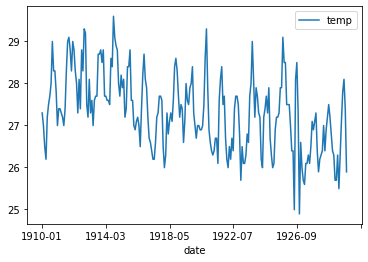

In [163]:
ts1_monthly.plot(x='date', y='temp')

Ежедневный ряд - daily-website-visitors.csv - скачан файлом из kaggle: https://www.kaggle.com/datasets/bobnau/daily-website-visitors?select=daily-website-visitors.csv

1) Датасет описывает частоту посещений сайта за день: всех (page.loads), уникальных (Unique.visits), возвращений на сайт (Returning.Visits) и Первых посещений

2) Имелись проблемы с разделителями - для тысяч использовалась запятая, было решено её убрать, чтобы можно было привести всё к инту, так как записи велись "поштучно"

3) UPD из пункта 4 - придется переделать формат даты, чтобы подходил для модели

In [164]:
# считаем файлы
ts2=pd.read_csv('daily-website-visitors.csv', index_col=0)
ts2['Page.Loads'] = ts2['Page.Loads'].apply(lambda x: int(x.replace(',', '')))
ts2['Unique.Visits'] = ts2['Unique.Visits'].apply(lambda x: int(x.replace(',', '')))
ts2['First.Time.Visits'] = ts2['First.Time.Visits'].apply(lambda x: int(x.replace(',', '')))
ts2['Returning.Visits'] = ts2['Returning.Visits'].apply(lambda x: int(x.replace(',', '')))
ts2

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,,,,,,,
1,Sunday,1,9/14/2014,2146,1582,1430,152
2,Monday,2,9/15/2014,3621,2528,2297,231
3,Tuesday,3,9/16/2014,3698,2630,2352,278
4,Wednesday,4,9/17/2014,3667,2614,2327,287
5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...
2163,Saturday,7,8/15/2020,2221,1696,1373,323
2164,Sunday,1,8/16/2020,2724,2037,1686,351
2165,Monday,2,8/17/2020,3456,2638,2181,457


In [165]:
ts2.describe()

,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


In [166]:
ts2['Date'] = ts2['Date'].apply(lambda x: '{2:02d}-{0:02d}-{1:02d}'.format(*list(map(int, x.split('/')))))
ts2['Date']

Row
1       2014-09-14
2       2014-09-15
3       2014-09-16
4       2014-09-17
5       2014-09-18
           ...    
2163    2020-08-15
2164    2020-08-16
2165    2020-08-17
2166    2020-08-18
2167    2020-08-19
Name: Date, Length: 2167, dtype: object

<AxesSubplot:xlabel='Date'>

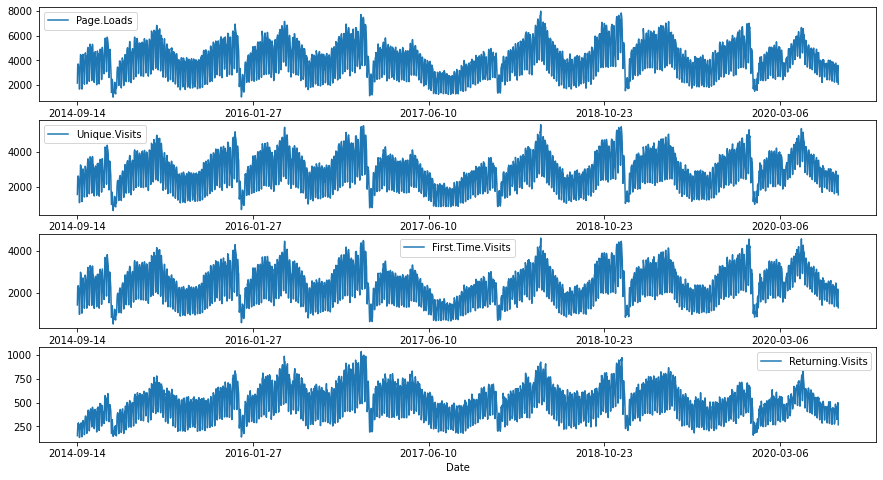

In [167]:
fig, ax = plt.subplots(4,figsize=(15,8))
ts2.plot(x='Date', y='Page.Loads', ax=ax[0])
ts2.plot(x='Date', y='Unique.Visits', ax=ax[1])
ts2.plot(x='Date', y='First.Time.Visits', ax=ax[2])
ts2.plot(x='Date', y='Returning.Visits', ax=ax[3])

Возьму исследование первых посещений - это кажется более чистыми данными, нежели page.loads

In [168]:
# сделаем разбиение на train/test
train_rate = 0.8
N1 = len(ts1_monthly)
train1_border = int(N1 * train_rate + 12)
ts1_train = ts1_monthly[:train1_border]
ts1_test = ts1_monthly[train1_border:]

N2 = len(ts2)
train2_border = int(N2 * train_rate)
ts2_train = ts2[:train2_border]
ts2_test = ts2[train2_border:]

Небольшой спойлер по поводу 3-го пункта: в отсутствие смещения выборки на год дальше, происходила неприятная ситуация - train-выборка заканчивалась ровно перед началом тренда на спад, что приводило к стабильному смещению графиков всех моделей. Поэтому было решено добавить +12 в train_border, чтобы модели заметили этот тренд

In [169]:
# заранее определеним временные и признаковые названия столбцов рядов

time1 = 'date'
value1 = 'temp'

time2 = 'Date'
value2 = 'First.Time.Visits'

### Важный момент

<AxesSubplot:ylabel='Frequency'>

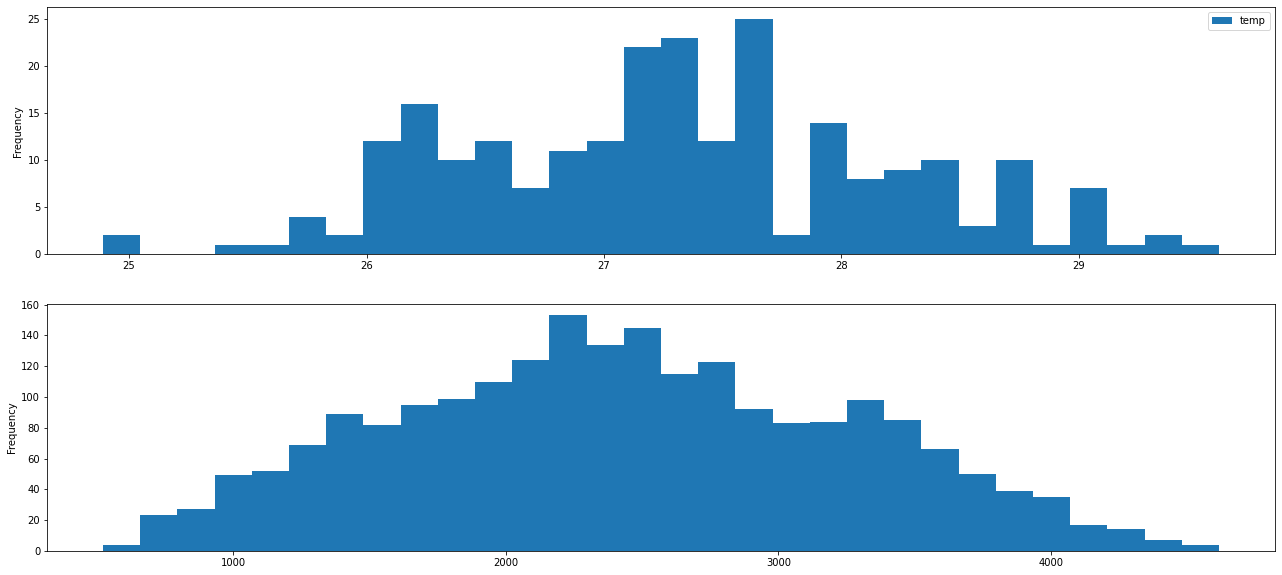

In [170]:
fig, ax = plt.subplots(2, figsize=(22, 10))
ts1_monthly.plot(kind = "hist", bins = 30, ax=ax[0])
ts2[value2].plot(kind = "hist", bins = 30, ax=ax[1])

Данные имеют более-менее нормальное распределение, логарифмирование как в 7-м семинаре не требуется

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

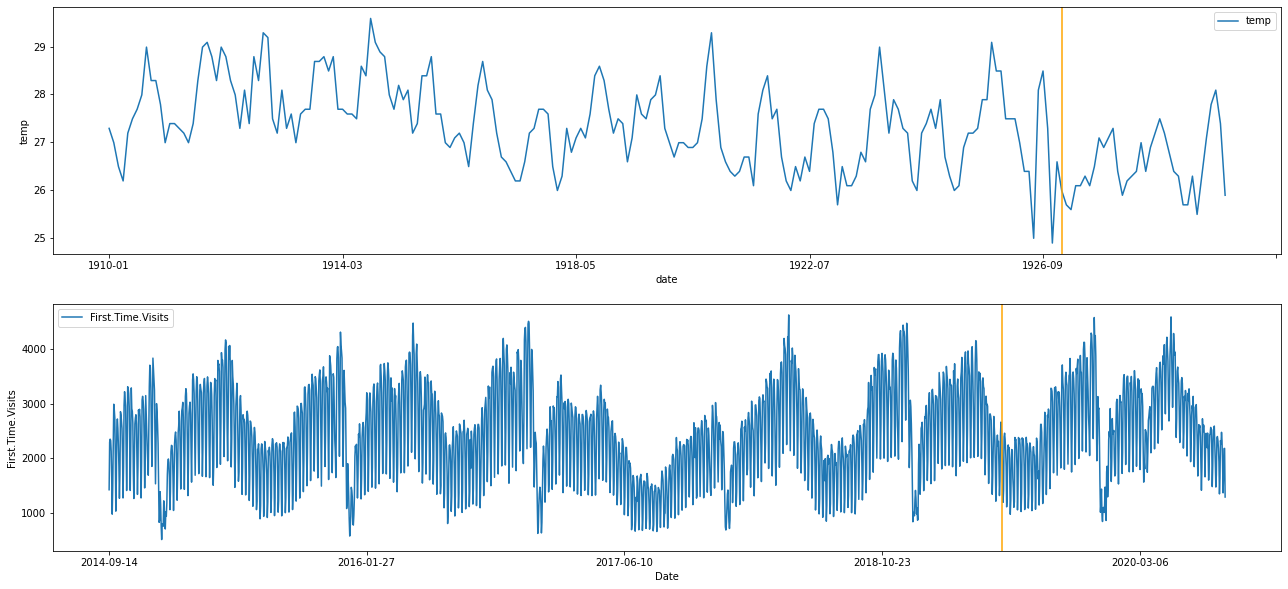

In [171]:
# отрисуем временные ряды
fig, ax = plt.subplots(2, figsize=(22, 10))
ts1_monthly.plot(x=time1, y=value1, ax=ax[0], ylabel=value1)
ax[0].axvline(train1_border, color='orange')

ts2.plot(x=time2, y=value2, ax=ax[1], ylabel=value2)
ax[1].axvline(train2_border, color='orange')

plt.show()

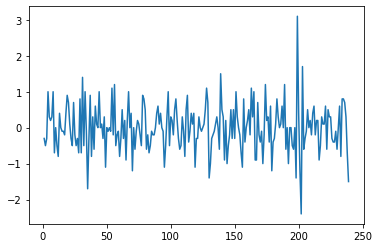

In [172]:
plt.plot(ts1_monthly[value1] - ts1_monthly[value1].shift())

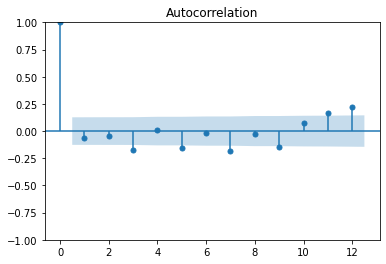

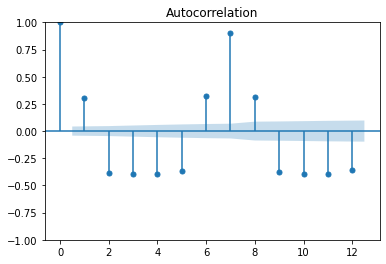

In [173]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
import statsmodels.api as sm

sm.graphics.tsa.plot_acf((ts1_monthly[value1] - ts1_monthly[value1].shift()).dropna(), lags=12, ax=None)
plt.show()

sm.graphics.tsa.plot_acf((ts2[value2] - ts2[value2].shift()).dropna(), lags=12, ax=None)
plt.show()

Что и следовало ожидать от средней температуры за месяц, данные коррелируют друг с другом через период в 12 месяцев

Ежедневный ряд в свою очередь определил еженедельную корреляцию данных

Для определение более точной сезонности (насколько это возможно по скорости), стандартизируем сезоны по среднему, перед выводом в график наложения

In [174]:
ts1_monthly[0:12]['temp'].mean()

27.556666666666672

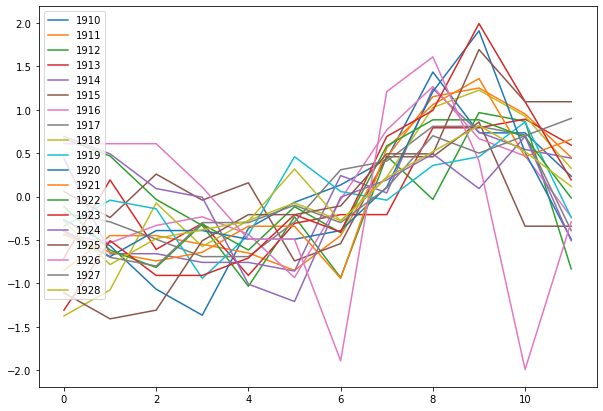

In [175]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
fig, ax = plt.subplots(figsize=(10,7))
for year, i in enumerate(range(0, N1-12, 12)):
    plt.plot(np.arange(0,12),ts1_monthly[i:i+12][value1]-ts1_monthly[i:i+12][value1].mean(), label=year+1910)
plt.legend();

Здесь сезонность хорошо проявлена во второй половине года - все графики имеют почти одновременный подъём и пик на 9-10-м месяце

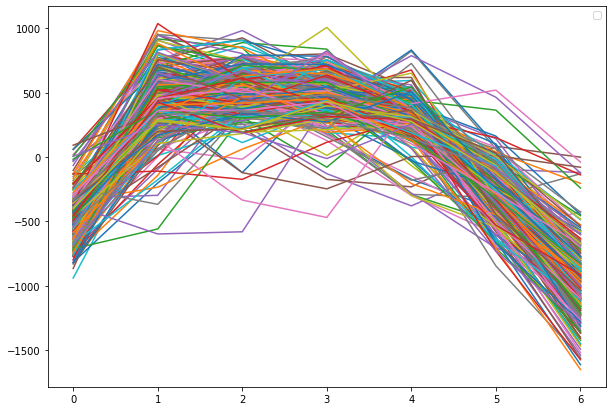

In [176]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
fig, ax = plt.subplots(figsize=(10,7))
for week, i in enumerate(range(0, N2-7, 7)):
    plt.plot(np.arange(0,7),ts2[i:i+7][value2]-ts2[i:i+7][value2].mean())
plt.legend([])

Здесь буквально виден кластер, подобный стандартной задаче прокрустова преобразования - что говорит о явной сезонности процесса временного ряда

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [177]:
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error

def trainer_x_tester(model, ts_train, ts_test, fh, tick_period, xy_label, model_name):
    # ваш код обучения моделей здесь
    model.fit(ts_train[xy_label[1]])
    y_pred = model.predict(fh)
    ts_test[xy_label[1]].plot()
    y_pred.plot(label='pred_'+xy_label[1])
    plt.xticks(ts_test.index[::tick_period], ts_test[xy_label[0]][::tick_period])
    plt.xlabel(xy_label[0])
    plt.ylabel(xy_label[1])
    plt.legend()
    plt.title(model_name)
    plt.show()
    # посчитайте метрики на test
    print('MAE =', round(mean_absolute_error(ts_test[xy_label[1]], y_pred),4))

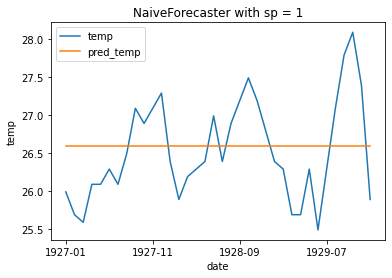

MAE = 0.5583


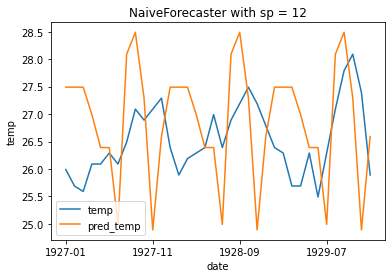

MAE = 1.0889


In [178]:
NF_1 = NaiveForecaster(strategy='last', sp=1)
NF_12 = NaiveForecaster(strategy='last', sp=12)
# forecast_horizone - набор первых шагов после последней записи train'а
fh = np.arange(len(ts1_test)) + 1
trainer_x_tester(NF_1, ts1_train, ts1_test, fh, 10, (time1, value1), 'NaiveForecaster with sp = 1')
trainer_x_tester(NF_12, ts1_train, ts1_test, fh, 10, (time1, value1), 'NaiveForecaster with sp = 12')

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


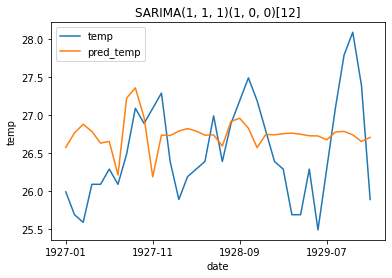

MAE = 0.5888


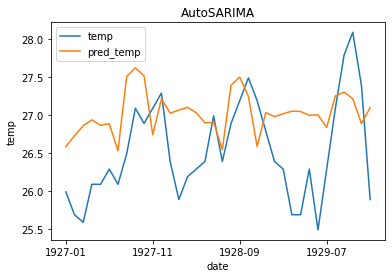

MAE = 0.6757


In [179]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
sarima_model1 = ARIMA((1,1,1),(1,0,0,12))
sarima_model2 = AutoARIMA(sp=12, d=1, max_p=2, max_q=2, suppress_warnings=True)
fh = np.arange(len(ts1_test)) + 1
trainer_x_tester(sarima_model1, ts1_train, ts1_test, fh, 10, (time1, value1), 'SARIMA(1, 1, 1)(1, 0, 0)[12]')
trainer_x_tester(sarima_model2, ts1_train, ts1_test, fh, 10, (time1, value1), 'AutoSARIMA')

### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


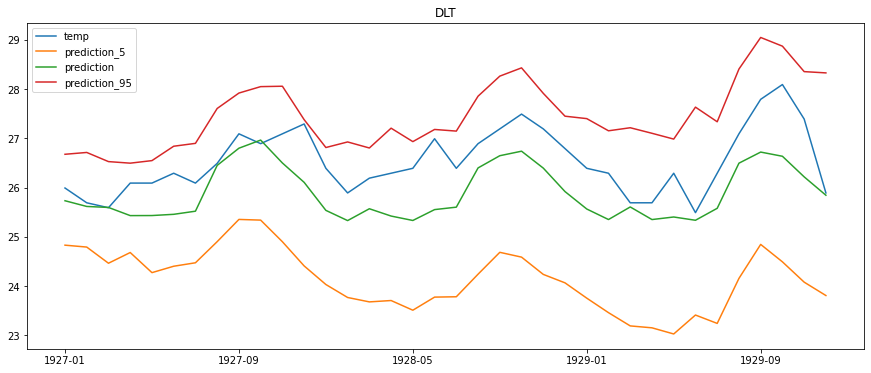

MAE with pred_5 = 2.378845598921
MAE with pred = 0.6438782033211159
MAE with pred_95 = 0.923923974019107


In [180]:
from orbit.models.lgt import LGT
from orbit.models.dlt import DLT

# ваш код обучения моделей здесь
dlt = DLT(
    response_col=value1,
    date_col=time1,
    seasonality=12
)
dlt.fit(ts1_train)
fig, ax = plt.subplots(figsize=(15,6))
y_pred = dlt.predict(ts1_test)
ts1_test.reset_index(drop=True).plot(ax=ax)
y_pred.plot(ax=ax)
plt.xticks(y_pred.index[::8], y_pred.date[::8])
plt.legend()
plt.title('DLT')
plt.show()
print('MAE with pred_5 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_5']))
print('MAE with pred =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction']))
print('MAE with pred_95 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_95']))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


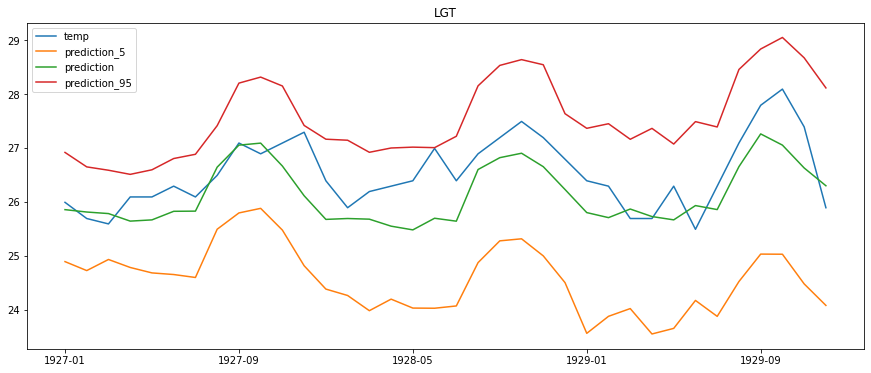

MAE LGT with pred_5 = 1.9636786056177316
MAE LGT with pred = 0.48854102790418086
MAE LGT with pred_95 = 1.0173497822013706


In [181]:
lgt = LGT(
    response_col=value1,
    date_col=time1,
    seasonality=12
)
lgt.fit(ts1_train)
fig, ax = plt.subplots(figsize=(15,6))
y_pred = lgt.predict(ts1_test)
ts1_test.reset_index(drop=True).plot(ax=ax)
y_pred.plot(ax=ax)
plt.xticks(y_pred.index[::8], y_pred.date[::8])
plt.legend()
plt.title('LGT')
plt.show()
print('MAE LGT with pred_5 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_5']))
print('MAE LGT with pred =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction']))
print('MAE LGT with pred_95 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_95']))

### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

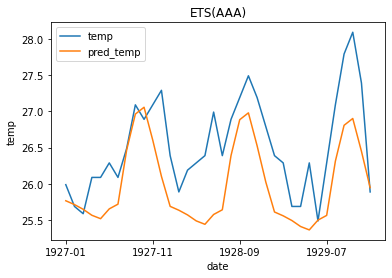

MAE = 0.5606


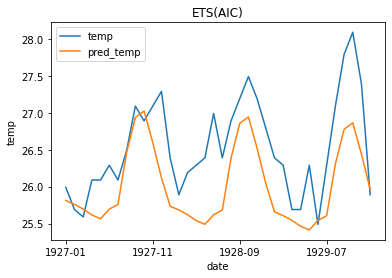

MAE = 0.5462


In [182]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

# ваш код обучения моделей здесь
ETS_AAA = ExponentialSmoothing(trend='additive', seasonal='additive', sp=12)
ETC_AIC = AutoETS(trend='mul', seasonal='mul', sp=12)

fh = np.arange(len(ts1_test)) + 1
trainer_x_tester(ETS_AAA, ts1_train, ts1_test, fh, 10, (time1, value1), 'ETS(AAA)')
trainer_x_tester(ETC_AIC, ts1_train, ts1_test, fh, 10, (time1, value1), 'ETS(AIC)')

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

Наилучшее предсказание оказалось у LGT (так как я делал рисунки для всех моделей, я просто повторю код выполнения LGT)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


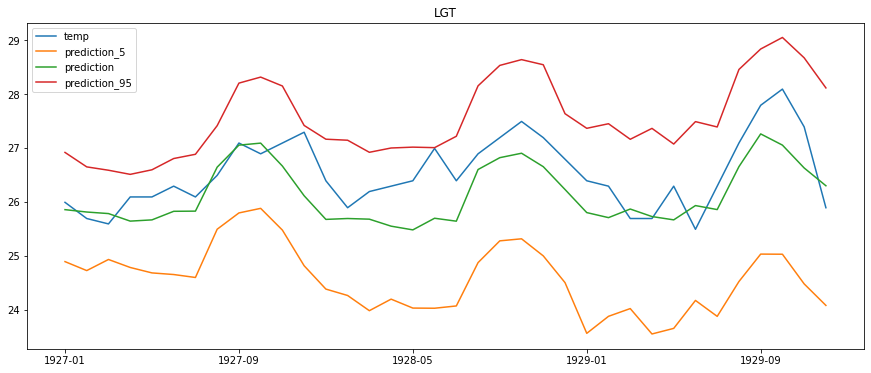

MAE LGT with pred_5 = 1.9636786056177316
MAE LGT with pred = 0.48854102790418086
MAE LGT with pred_95 = 1.0173497822013706


In [183]:
# нарисуйте пресказания
lgt = LGT(
    response_col=value1,
    date_col=time1,
    seasonality=12
)
lgt.fit(ts1_train)
fig, ax = plt.subplots(figsize=(15,6))
y_pred = lgt.predict(ts1_test)
ts1_test.reset_index(drop=True).plot(ax=ax)
y_pred.plot(ax=ax)
plt.xticks(y_pred.index[::8], y_pred.date[::8])
plt.legend()
plt.title('LGT')
plt.show()
print('MAE LGT with pred_5 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_5']))
print('MAE LGT with pred =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction']))
print('MAE LGT with pred_95 =', mean_absolute_error(ts1_test[value1].reset_index(drop=True), y_pred['prediction_95']))

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

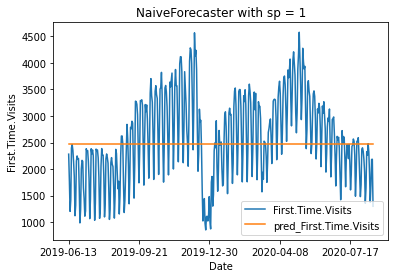

MAE = 642.8203


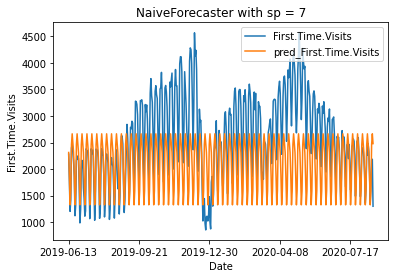

MAE = 638.3502


In [184]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
NF_1 = NaiveForecaster(strategy='last', sp=1)
NF_7 = NaiveForecaster(strategy='last', sp=7)
# forecast_horizone - набор первых шагов после последней записи train'а
fh = np.arange(len(ts2_test)) + 1
trainer_x_tester(NF_1, ts2_train, ts2_test, fh, 100, (time2, value2), 'NaiveForecaster with sp = 1')
trainer_x_tester(NF_7, ts2_train, ts2_test, fh, 100, (time2, value2), 'NaiveForecaster with sp = 7')

### KTR из orbit (1 балл).



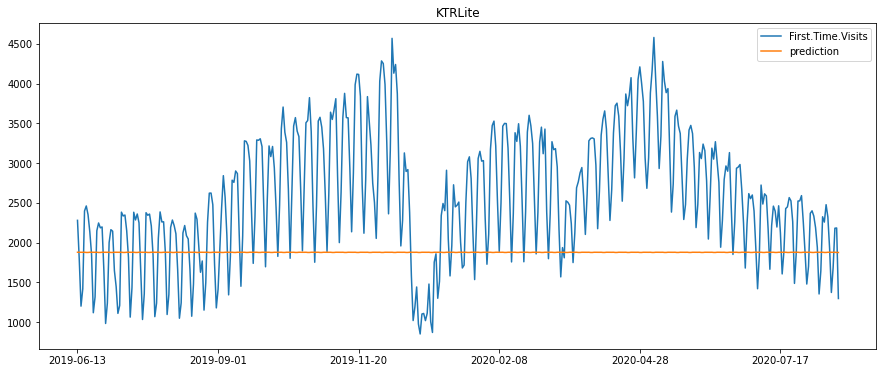

MAE with pred = 853.7194107693217


In [185]:
from orbit.models.ktrlite import KTRLite
# ваш код обучения моделей здесь
ktrl = KTRLite(
    response_col=value2,
    date_col=time2,
    seasonality=7
)
ktrl.fit(df=ts2_train[[time2, value2]])
fig, ax = plt.subplots(figsize=(15,6))
y_pred = ktrl.predict(df=ts2_test[[time2, value2]])
ts2_test[value2].reset_index(drop=True).plot(ax=ax)
y_pred.plot(ax=ax)
plt.xticks(y_pred.index[::80], y_pred.Date[::80])
plt.legend()
plt.title('KTRLite')
plt.show()
print('MAE with pred =', mean_absolute_error(ts2_test[value2].reset_index(drop=True), y_pred['prediction']))

Комментарий автора - я не понимаю, что с ним не так, правда)))) 

Если убрать истинное значение, то будут видны такие же колебания, просто раз в 100 меньше))

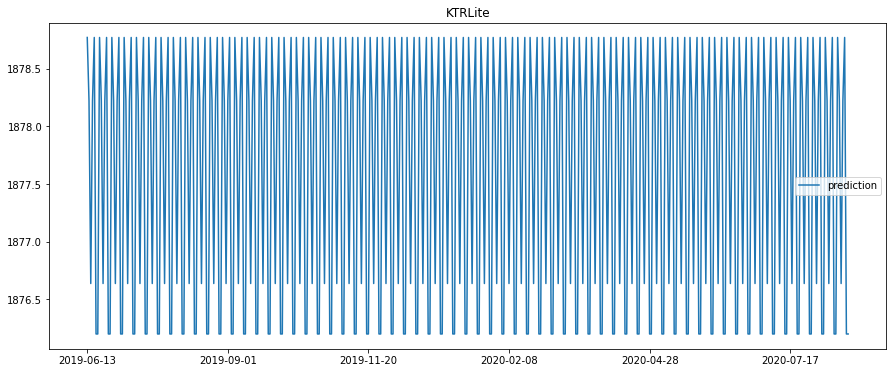

In [186]:
fig, ax = plt.subplots(figsize=(15,6))
y_pred.plot(ax=ax)
plt.xticks(y_pred.index[::80], y_pred.Date[::80])
plt.legend()
plt.title('KTRLite')
plt.show()

In [187]:
# посчитайте метрики на test

### Phophet (1 балл).



In [188]:
from prophet import Prophet

# ваш код обучения моделей здесь
ts2_prophetrain = pd.DataFrame({'ds': ts2_train[time2], 'y' : ts2_train[value2]})
ts2_prophetest = pd.DataFrame({'ds': ts2_test[time2], 'y' : ts2_test[value2]})
p = Prophet()
p.fit(ts2_prophetrain)
y_pred = p.predict(ts2_prophetest)
y_pred

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-06-13,2517.624096,2277.870330,2930.005017,2517.624096,2517.624096,72.235431,72.235431,72.235431,318.077672,318.077672,318.077672,-245.842242,-245.842242,-245.842242,0.0,0.0,0.0,2589.859526
1,2019-06-14,2517.482486,1639.995523,2306.562232,2517.482486,2517.482486,-550.854454,-550.854454,-550.854454,-277.361148,-277.361148,-277.361148,-273.493306,-273.493306,-273.493306,0.0,0.0,0.0,1966.628032
2,2019-06-15,2517.340876,885.986358,1579.418679,2517.340876,2517.340876,-1283.029570,-1283.029570,-1283.029570,-979.497086,-979.497086,-979.497086,-303.532483,-303.532483,-303.532483,0.0,0.0,0.0,1234.311306
3,2019-06-16,2517.199266,1342.133138,2020.217543,2517.199266,2517.199266,-832.534001,-832.534001,-832.534001,-496.924593,-496.924593,-496.924593,-335.609408,-335.609408,-335.609408,0.0,0.0,0.0,1684.665265
4,2019-06-17,2517.057656,2250.146633,2933.457029,2517.057656,2517.057656,70.863854,70.863854,70.863854,440.181306,440.181306,440.181306,-369.317452,-369.317452,-369.317452,0.0,0.0,0.0,2587.921510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2020-08-15,2456.873473,33.345472,1640.032340,1703.990097,3190.427343,-1608.889193,-1608.889193,-1608.889193,-979.497086,-979.497086,-979.497086,-629.392106,-629.392106,-629.392106,0.0,0.0,0.0,847.984280
430,2020-08-16,2456.731863,519.068590,2160.192212,1701.346139,3192.754956,-1122.838198,-1122.838198,-1122.838198,-496.924593,-496.924593,-496.924593,-625.913605,-625.913605,-625.913605,0.0,0.0,0.0,1333.893665
431,2020-08-17,2456.590253,1430.510834,3064.770251,1699.946060,3195.082568,-182.802766,-182.802766,-182.802766,440.181306,440.181306,440.181306,-622.984072,-622.984072,-622.984072,0.0,0.0,0.0,2273.787487
432,2020-08-18,2456.448643,1460.210849,3157.213820,1697.231987,3197.410180,-104.815678,-104.815678,-104.815678,515.782612,515.782612,515.782612,-620.598290,-620.598290,-620.598290,0.0,0.0,0.0,2351.632966


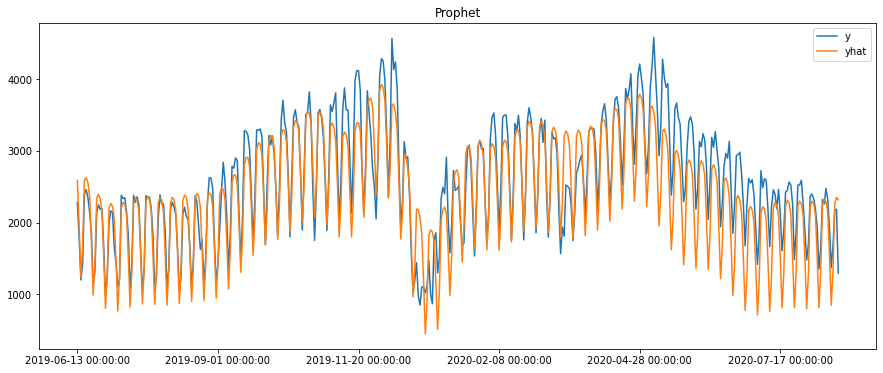

MAE with pred = 309.0025760330761


In [189]:
fig, ax = plt.subplots(figsize=(15,6))
ts2_prophetest['y'].reset_index(drop=True).plot(ax=ax)
y_pred['yhat'].plot(ax=ax)
plt.xticks(y_pred.index[::80], y_pred.ds[::80])
plt.legend()
plt.title('Prophet')
plt.show()
print('MAE with pred =', mean_absolute_error(ts2_test[value2].reset_index(drop=True), y_pred['yhat']))

Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [190]:
# нарисуйте пресказания

Лучшая модель оказалась Prophet - здесь график будет с доверительными интервалами

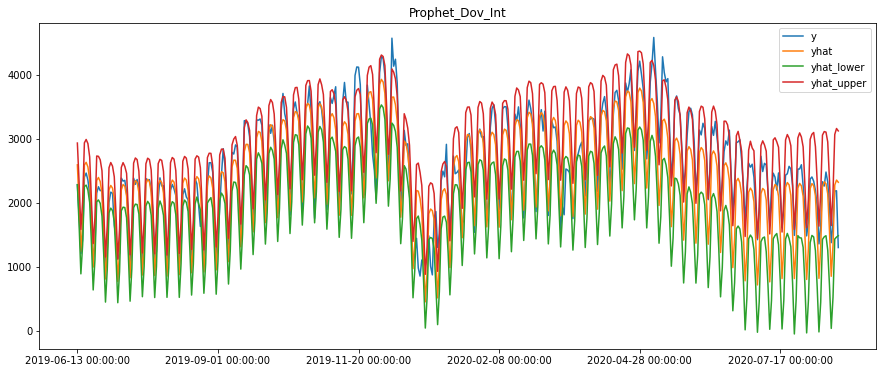

In [191]:
fig, ax = plt.subplots(figsize=(15,6))
ts2_prophetest['y'].reset_index(drop=True).plot(ax=ax)
y_pred[['yhat', 'yhat_lower','yhat_upper']].plot(ax=ax)
plt.xticks(y_pred.index[::80], y_pred.ds[::80])
plt.legend()
plt.title('Prophet_Dov_Int')
plt.show()

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [192]:
ts1_monthly[:11]

,date,temp
0,1910-01,27.29
1,1910-02,26.99
2,1910-03,26.49
3,1910-04,26.19
4,1910-05,27.19
5,1910-06,27.49
6,1910-07,27.69
7,1910-08,27.99
8,1910-09,28.99
9,1910-10,28.29


In [193]:
# обучите классические модели ML
period = 10
columns = [f't-{i}' for i in range(period, 0, -1)]
columns.append('y')
ts1_ml = pd.DataFrame(columns=columns)
ts1_ml
for i in range(period, len(ts1_monthly)):
    for j, col in enumerate(columns[::-1]):
        ts1_ml.loc[i,col] = ts1_monthly.loc[i-j][value1]
ts1_ml

,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,y
10,27.29,26.99,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29
11,26.99,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79
12,26.49,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79,26.99
13,26.19,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79,26.99,27.39
14,27.19,27.49,27.69,27.99,28.99,28.29,28.29,27.79,26.99,27.39,27.39
...,...,...,...,...,...,...,...,...,...,...,...
235,27.49,27.19,26.79,26.39,26.29,25.69,25.69,26.29,25.49,26.29,27.09
236,27.19,26.79,26.39,26.29,25.69,25.69,26.29,25.49,26.29,27.09,27.79
237,26.79,26.39,26.29,25.69,25.69,26.29,25.49,26.29,27.09,27.79,28.09
238,26.39,26.29,25.69,25.69,26.29,25.49,26.29,27.09,27.79,28.09,27.39


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ts1_ml[columns[:-1]], ts1_ml[columns[-1]], shuffle=False)

In [195]:
def trainer_x_tester_ml(model, train, test, model_name):
    # ваш код обучения моделей здесь
    model.fit(*train)
    y_pred = model.predict(test[0])
    test[1].plot()
    plt.plot(test[1].index, y_pred, label='pred')
    plt.title(model_name)
    plt.show()
    # посчитайте метрики на test
    print('MAE =', round(mean_absolute_error(test[1], y_pred),4))

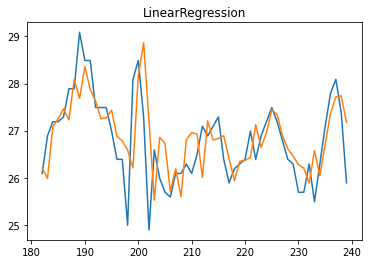

MAE = 0.5363


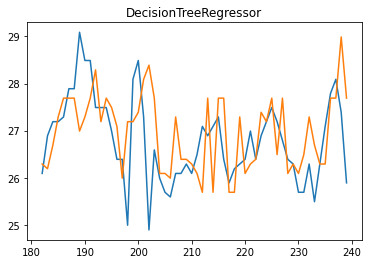

MAE = 0.7017


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


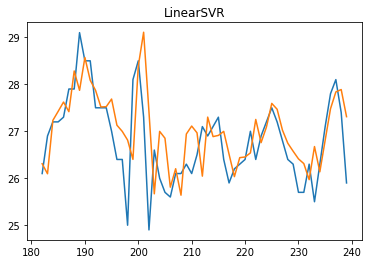

MAE = 0.5634


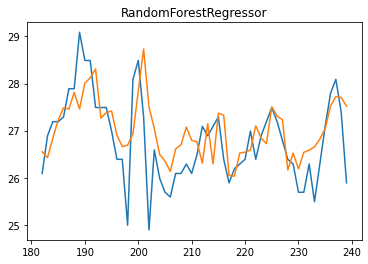

MAE = 0.5458


In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

LinReg = LinearRegression()
trainer_x_tester_ml(LinReg, (X_train, y_train), (X_test, y_test), 'LinearRegression')

TreeReg = DecisionTreeRegressor()
trainer_x_tester_ml(TreeReg, (X_train, y_train), (X_test, y_test), 'DecisionTreeRegressor')

L_SVR = LinearSVR()
trainer_x_tester_ml(L_SVR, (X_train, y_train), (X_test, y_test), 'LinearSVR')

RFR = RandomForestRegressor()
trainer_x_tester_ml(RFR, (X_train, y_train), (X_test, y_test), 'RandomForestRegressor')

Лучшей по MAE оказался классическая линейная регрессия

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания